<div align='center' style='font-size:100%'><b>Introduction to Tellurium, Antimony, and libRoadRunner</b></div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-and-libroadrunner.png" width="60%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Head of Outreach, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

# Links to relevant resources

<a href="https://github.com/sys-bio/tellurium#installation-instructions">Tellurium installation instructions</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/antimony.html">Antimony documentation</a><br>
<a href="https://nanohub.org/resources/tellurium">Tellurium environment on nanoHUB</a><br>

# Tellurium, Antimony, and libRoadRunner support rapid simulation and analysis of kinetic models

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px"></div>

# Importing relevant packages

In [ ]:
import tellurium as te # Python-based modeling environment for kinetic models
import numpy as np # Scientific computing package
import random # Generate random numbers
import matplotlib.pylab as plt # Additional Python plotting utilities


# Writing a simple model in the Antimony language
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-antimony.png" width="75%" style="padding: 20px"></div>

In [ ]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;      # specify species
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment


    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
end
"""

# Simulating the simple Antimony Model

In [ ]:
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
result = r.simulate(0, 10, 25) # simulate(time_start, time_end, number_of_points)
print(result)


        time,        [S1],    [S2]
 [[        0,          10,       0],
  [ 0.416667,      6.5924,  3.4076],
  [ 0.833333,     4.34599, 5.65401],
  [     1.25,     2.86506, 7.13494],
  [  1.66667,     1.88877, 8.11123],
  [  2.08333,     1.24516, 8.75484],
  [      2.5,    0.820861, 9.17914],
  [  2.91667,    0.541147, 9.45885],
  [  3.33333,    0.356747, 9.64325],
  [     3.75,    0.235183, 9.76482],
  [  4.16667,    0.155042, 9.84496],
  [  4.58333,    0.102211, 9.89779],
  [        5,   0.0673815, 9.93262],
  [  5.41667,   0.0444208, 9.95558],
  [  5.83333,   0.0292841, 9.97072],
  [     6.25,   0.0193053, 9.98069],
  [  6.66667,   0.0127269, 9.98727],
  [  7.08333,   0.0083901, 9.99161],
  [      7.5,  0.00553111, 9.99447],
  [  7.91667,  0.00364634, 9.99635],
  [  8.33333,  0.00240382,  9.9976],
  [     8.75,   0.0015847, 9.99842],
  [  9.16667,   0.0010447, 9.99896],
  [  9.58333, 0.000688713, 9.99931],
  [       10, 0.000454029, 9.99955]]



# Plotting the simple Antimony Model

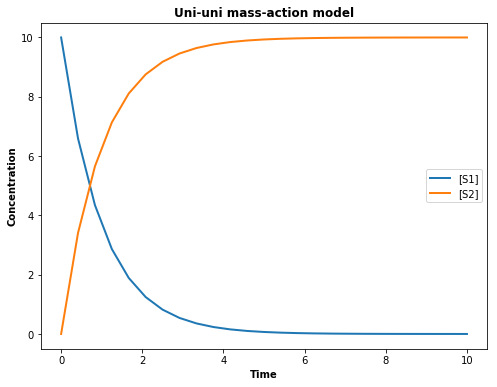

In [ ]:
r.plot(title = 'Uni-uni mass-action model', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6))


# Adding events to an Antimony string

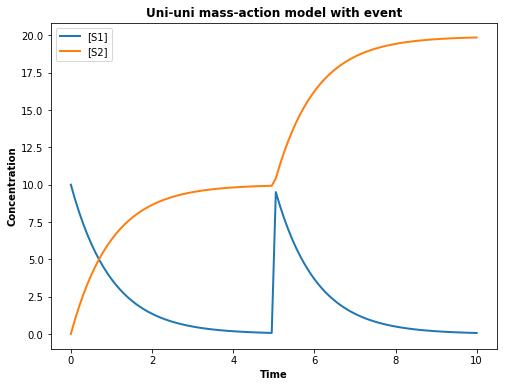

In [ ]:
Ant_str = """
model test               # name the model
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
    E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6))



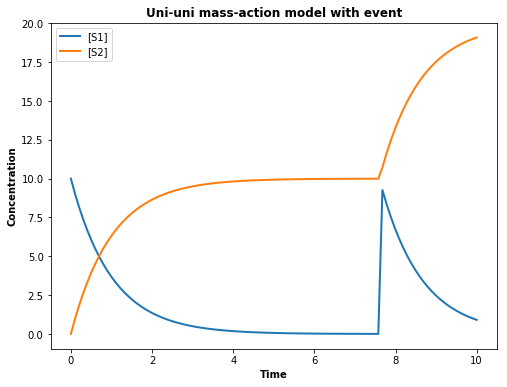

In [ ]:
ant_str = """
model test               # name the model
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
    E1: at (S1 < 0.005): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6))



# Writing an Antimony model with interactions
<br>
Repressilator circuit from Elowitz & Liebler (2000):
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/repressilator.png" width="40%" style="padding: 20px"></div>

In [ ]:
repressilator_str = """
# Compartments and Species:
species M1, P3, P1, M2, P2, M3;

# Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

# Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

# Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.35628834784826;
d_p2 = 0.520562081730298;
a_m3 = 0.417889543691157;
Kr_P2 = 2.71031378955001;
n3 = 0.44365980532785;
leak3 = 3.63586125130783e-11;
d_m3 = 0.805873530762994;
a_p3 = 4.61276807677109;
d_p3 = 1.54954108126666;

"""

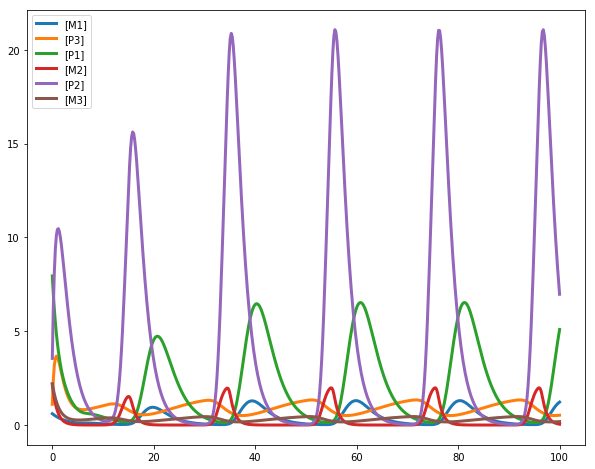

In [ ]:
repressilator = te.loada(repressilator_str)
repressilator.simulate(0, 100, 500)
repressilator.plot(figsize = (10, 8), linewidth = 3)


# SBML description format vs. human-readable Antimony string

In [ ]:
#%% repressilator model SBML
print(repressilator.getCurrentSBML())


<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="__main" name="__main">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="M1" compartment="default_compartment" initialConcentration="1.22326489649967" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="P3" compartment="default_compartment" initialConcentration="0.523696242501221" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="P1" compartment="default_compartment" initialConcentration="5.09251992154855" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="M2" compartment="default_compartment" initialConcentration="0.0419666930233048" hasOnlySubstanceUnits="false" boundaryCo

In [ ]:
#%% repressilator model Antimony string
print(repressilator.getAntimony())

// Created by libAntimony v2.9.4
// Compartments and Species:
species M1, P3, P1, M2, P2, M3;

// Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

// Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

// Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.35628834784826

# Import and export capabilities with Tellurium
<br>
Models can be imported from the BioModels Database, given the appropriate BioModel ID. However, due to a firewall on nanoHUB, we are unable to perform this import. Instead, upload BIOMD0000000090.xml to your Tellurium tool on nanoHUB.

This is a model of respiratory oscillations in Saccharomyces cerevisae by <a href="https://www.ebi.ac.uk/biomodels/BIOMD0000000090">Jana Wolf et al. (2001):</a> </div>
<br>

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_publication.PNG" width="65%" style="padding: 20px"></div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_network.PNG" width="65%" style="padding: 20px"></div>

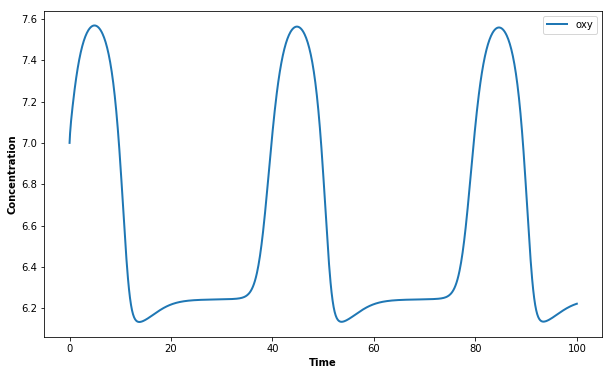

In [ ]:
#%% You can load an SBML model directly from the BioModels Database, given the BioModel ID
# wolf = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000090")
wolf = te.loadSBMLModel("BIOMD0000000090.xml")
wolf.simulate(0, 100, 1000, ['time', 'oxy']) # note that specific species can be selected for recording concentrations over the timecourse
wolf.plot(figsize = (10, 6), xtitle = 'Time', ytitle = 'Concentration')


In [ ]:
# Export the model you just accessed from BioModels to the current directory as an SBML string
wolf.reset()
print(wolf.getFloatingSpeciesConcentrationIds())
wolf.exportToAntimony('wolf.txt', current = True)
# wolf.exportToSBML('wolf.xml', current = True)


['[oxy]', '[A3c]', '[aps]', '[pap]', '[sul]', '[eth]', '[hyd]', '[cys]', '[N2]', '[aco]', '[oah]', '[S1]', '[A3m]']


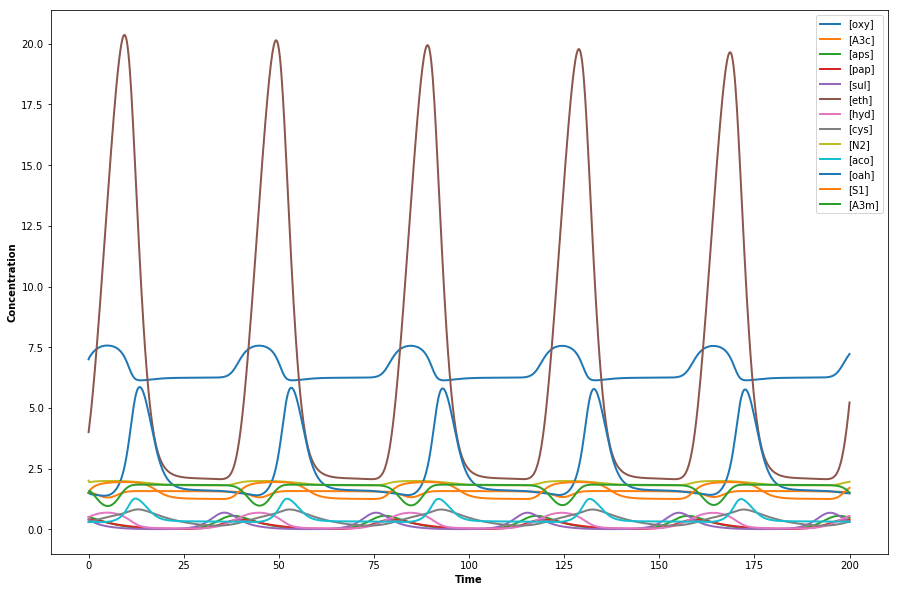

In [ ]:
wolf = te.loada('wolf.txt') # load the Antimony string you just saved to the working directory
wolf.simulate(0, 200, 1000)
wolf.plot(figsize = (15, 10), xtitle = 'Time', ytitle = 'Concentration')


# Exercises

## Exercise 1:

Write an Antimony model for the network you previously wrote reactions and a differential equations model for:

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-model.png" width="40%" style="padding: 20px"></div>

In [ ]:
# Exercise 1 Solution

# Write a simple antimony string
antStr = '''

    J1: S1 -> S2; k1*S1; # Reaction names 'J1', 'J2'
    J2: S2 -> S3; k2*S2;

    k1 = 0.15; k2 = 0.45; # Specify parameter values
    S1 = 1; S2 = 0; S3 = 0; # Specify initial conditions
'''

## Exercise 2:

Create a RoadRunner object instance with your Antimony string from Exercise 1 and simulate your model from time 0 to time 20 with 50 data points.

In [ ]:
# Exercise 2 Solution

# Load the Antimony string to a RoadRunner object instance 'r'
r = te.loada(antStr)

# Simulate the model (numerically integrate the differential equations)
r.simulate(0, 20, 50)

## Exercise 3:

Plot the simulation from Exercise 2 with a title and x and y axis labels.

In [ ]:
# Exercise 3 Solution

# Plot the simulation results
r.plot(title  = 'Simple reaction network', xtitle = 'Time', ytitle = 'Concentration')

## Exercise 4:

Reset your model from Exercises 1-3, simulate, and plot only the species S2 concentration timecourse.

In [ ]:
# Exercise 4 Solution

# Reset the model species concentrations to the initial conditions
r.reset()

# Simulate the model with selections 'time' and 'S2'
r.simulate(0, 20, 50, ['time', 'S2'])
r.plot(title  = 'Simple reaction network: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')

## Exercise 5:

Add an event to your Antimony string to set k2 = 0.01 after 10 seconds of simulation time. Load the string to create a RoadRunner instance, simulate the model and plot the timecourse of S2 concentration and k2 values throughout the simulation.

In [ ]:
# Exercise 5 Solution

# Add an event to the Antimony string
antStr_with_event = antStr + '''E1: at (time > 10): k2 = 0.01'''
r = te.loada(antStr_with_event)

# Simulate the model with an event, and record the value of 'k2'
r.simulate(0, 20, 50, ['time', 'S2', 'k2'])
r.plot(title  = 'Simple reaction network with event: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')

## Exercise 6:

Export an SBML file of your model from the previous challenges to your current working directory. Use the initial model settings from Exercise 1. Then import and load the SBML file you have just saved, simulate, and ensure your simulation results match those in Exercise 3.

Hint: if you import the os package, you can use the command os.getcwd() to get a string to your current working directory.


Saving your models as declarative SBML files will allow you to exchange your model between simulation, validation, and visualization platforms. To demonstrate the exchangeability of the SBML standard, launch <a href="https://libsbmljsdemo.github.io/#/">this simulator</a> in your browser and locate and drag your saved SBML file into the simulator to load and simulate the model.


In [ ]:
# Exercise 6 Solution
import os

# Export the model to an SBML description format, set current = False to reset to the Antimony string values
r.exportToSBML(os.getcwd() + '\\three_species_sbml.xml', current = False)

In [ ]:
# Load the saved SBML file to a RoadRunner instance
r = te.loadSBMLModel('three_species_sbml.xml')
r.simulate(0, 50, 100)
r.plot()

## Exercise 7:

Download the <a href="http://www.ebi.ac.uk/biomodels-main/BIOMD0000000010 "> Kholodenko 2000 model</a> of ultrasensitivity and negative feedback oscillations in the MAPK cascade from the BioModels Database, and upload to your nanoHUB workspace. Simulate and plot simulation results for the model.

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/kholodenko_publication.PNG" width="75%"></div>


In [ ]:
# Exercise 7 Solution
r = te.loadSBMLModel('BIOMD0000000010_url.xml')
r.simulate(0, 5000, 1000)
r.plot()

# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgments.png" width="80%"></div>

<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
         <li>
            <p> M.B. Elowitz, S. Leibler, <cite>A synthetic oscillatory network
of transcriptional regulators.</cite>, Nature Letters, vol. 403, Jan. 2000.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>